Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Наш датасет содерижт два файла movie.csv и credits.csv

Посмотрим содержимое первых пяти строк файла movie.csv и credits.csv

In [3]:
data_movie = pd.read_csv('movie.csv')
data_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
data_credit = pd.read_csv('credits.csv')
data_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# EDA

Проверим какие столбцы присутстствуют в в файле movie.csv

In [5]:
data_movie.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Опишем, что означает каждый столбец

* budget — Бюджет, в рамках которого был снят фильм.

* genre — Жанр фильма: боевик, комедия, триллер и т. д.

* homepage — Ссылка на официальный сайт фильма.

* id — Идентификатор фильма (совпадает с movie_id из первого набора данных).

* keywords — Ключевые слова или теги, связанные с фильмом.

* original_language — Язык, на котором изначально был снят фильм.

* original_title — Название фильма до перевода или адаптации.

* overview — Краткое описание сюжета фильма.

* popularity — Числовой показатель, отражающий популярность фильма.

* production_companies — Кинокомпании, участвовавшие в производстве фильма.

* production_countries — Страны, в которых был произведён фильм.

* release_date — Дата выхода фильма.

* revenue — Мировые кассовые сборы фильма.

* runtime — Продолжительность фильма в минутах.

* status — Статус фильма: "Вышел" или "Ожидается".

* tagline — Слоган фильма.

* title — Название фильма.

* vote_average — Средняя оценка, полученная фильмом.

* vote_count — Общее количество голосов, полученных фильмом.

Посмотрим на второй файл credits.csv

In [6]:
data_credit.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

* movie_id — Уникальный идентификатор для каждого фильма.

* cast — Имена главных и второстепенных актёров.

* crew — Имена членов съёмочной группы: режиссёра, монтажёра, композитора, сценариста и других.

Объединим два файла по ID

In [7]:
data_credit.columns = ['id','title','cast','crew']
data_all= data_movie.merge(data_credit,on='id')

Посмотрим на объеденённые данные

In [8]:
data_all.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Для задачи предсказания популярности трека столбец ID не несет никакой полезной информации, поэтому удалим его, также у нас образовались столбцы дубликаты title_x, title_y удалим один из них.

In [9]:
data = data_all.drop(['id','title_y'], axis = 1)
data.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

# Описание датасета фильмов
Размер датасета: 4803 строк (фильмов), 22 признака (столбца)

Целевая переменная: vote_average — средняя оценка фильма

# Типы признаков:
## Числовые признаки (6):
budget — бюджет фильма (целое число)

popularity — популярность (вещественное число)

revenue — доход от проката (целое число)

runtime — продолжительность фильма в минутах (вещественное число)

vote_average — средняя оценка (вещественное число, таргет)

vote_count — количество голосов (целое число)

## Категориальные признаки (8):
original_language — язык оригинальной версии

status — статус фильма ("Released", "Rumored" и т. д.)

genres — жанры (может содержать несколько жанров, закодированы в строке/JSON)

production_companies — киностудии

production_countries — страны производства

spoken_languages — языки, на которых говорят персонажи

cast — актёрский состав (строка со списком актёров)

crew — съёмочная группа (строка с ролями и именами)

## Текстовые признаки (7):
original_title — оригинальное название

title_x, title_y — дубликаты названия фильма

overview — краткое описание фильма

tagline — слоган

keywords — ключевые слова, теги

homepage — ссылка на сайт фильма

## Дата:
release_date — дата выхода фильма (в формате строки, нужно преобразовать в datetime)

# Пропущенные значения:
homepage - 3091
overview - 3
release_date - 1
runtime - 2
tagline- 844

Построим корреляционную матрицу, чтобы посмотреть на взаимосвязь признаков, сразу включаем в матрицу только числовые признаки:

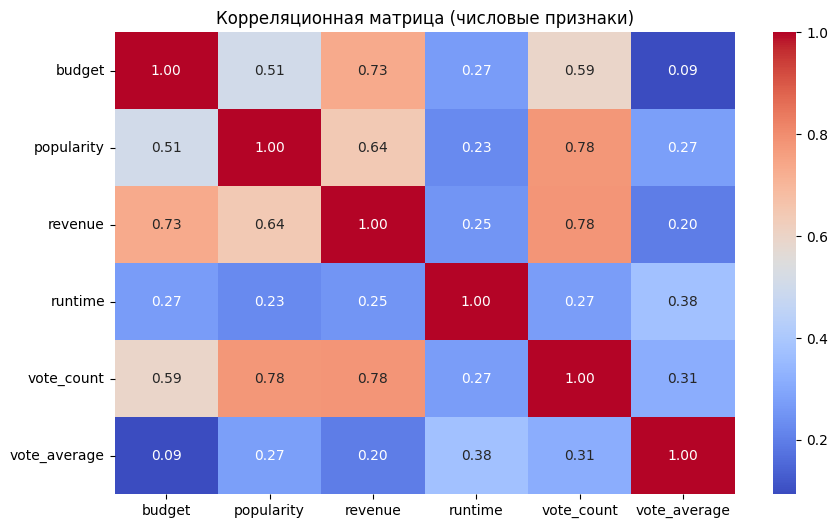

In [11]:
num_cols = ["budget", "popularity", "revenue", "runtime", "vote_count", "vote_average"]
corr_matrix = data[num_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица (числовые признаки)")
plt.show()

Категориальные признаки напрямую нельзя вставить в .corr(), поэтому используем LabelEncoder для столбцов где мало уникальных значений

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["original_language_encoded"] = le.fit_transform(data["original_language"])
data["status_encoded"] = le.fit_transform(data["status"])
extra_corr = data[["original_language_encoded", "status_encoded", "vote_average"]].corr()

Преобразем мультикатегориальные признаки(genres, production_companies,cast) через multi-hot encoding

In [13]:
import ast

def extract_genres(text):
    try:
        genres = [d["name"] for d in ast.literal_eval(text)]
        return genres
    except:
        return []

data["genres_list"] = data["genres"].apply(extract_genres)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data["genres_list"]), columns=mlb.classes_)
data = pd.concat([data, genres_encoded], axis=1)

import pandas as pd
import ast
from collections import Counter

# --- Функции для парсинга JSON-строк в списки ---
def extract_names(text):
    try:
        return [d['name'] for d in ast.literal_eval(text)]
    except:
        return []

# --- Распарсить компании и актёров ---
data["company_list"] = data["production_companies"].apply(extract_names)
data["cast_list"] = data["cast"].apply(extract_names)

# --- Подсчёт частот ---
all_companies = [company for sublist in data["company_list"] for company in sublist]
all_actors = [actor for sublist in data["cast_list"] for actor in sublist]

company_counts = Counter(all_companies)
actor_counts = Counter(all_actors)

# --- Отбор топ-N популярных (порог можно менять) ---
top_companies = [name for name, count in company_counts.items() if count >= 15]
top_actors = [name for name, count in actor_counts.items() if count >= 20]

# --- Добавление бинарных признаков: одна колонка на каждую популярную компанию ---
for company in top_companies:
    col_name = f"company_{company[:30].replace(' ', '_').replace('-', '_')}"  # аккуратные имена
    data[col_name] = data["company_list"].apply(lambda x: int(company in x))

# --- Добавление бинарных признаков: одна колонка на каждого популярного актёра ---
for actor in top_actors:
    col_name = f"actor_{actor[:30].replace(' ', '_').replace('-', '_')}"
    data[col_name] = data["cast_list"].apply(lambda x: int(actor in x))

# Один бинарный столбец: есть ли хотя бы один популярный актёр
data["popular_actor"] = data["cast_list"].apply(
    lambda cast: int(any(actor in cast for actor in top_actors))
)

# Один бинарный столбец: есть ли хотя бы одна популярная компания
data["popular_company"] = data["company_list"].apply(
    lambda companies: int(any(company in companies for company in top_companies))
)


C:\Users\user\AppData\Local\Temp\ipykernel_12388\264622154.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name] = data["cast_list"].apply(lambda x: int(actor in x))
C:\Users\user\AppData\Local\Temp\ipykernel_12388\264622154.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name] = data["cast_list"].apply(lambda x: int(actor in x))
C:\Users\user\AppData\Local\Temp\ipykernel_12388\264622154.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Составим объединенную матрицу кореляции

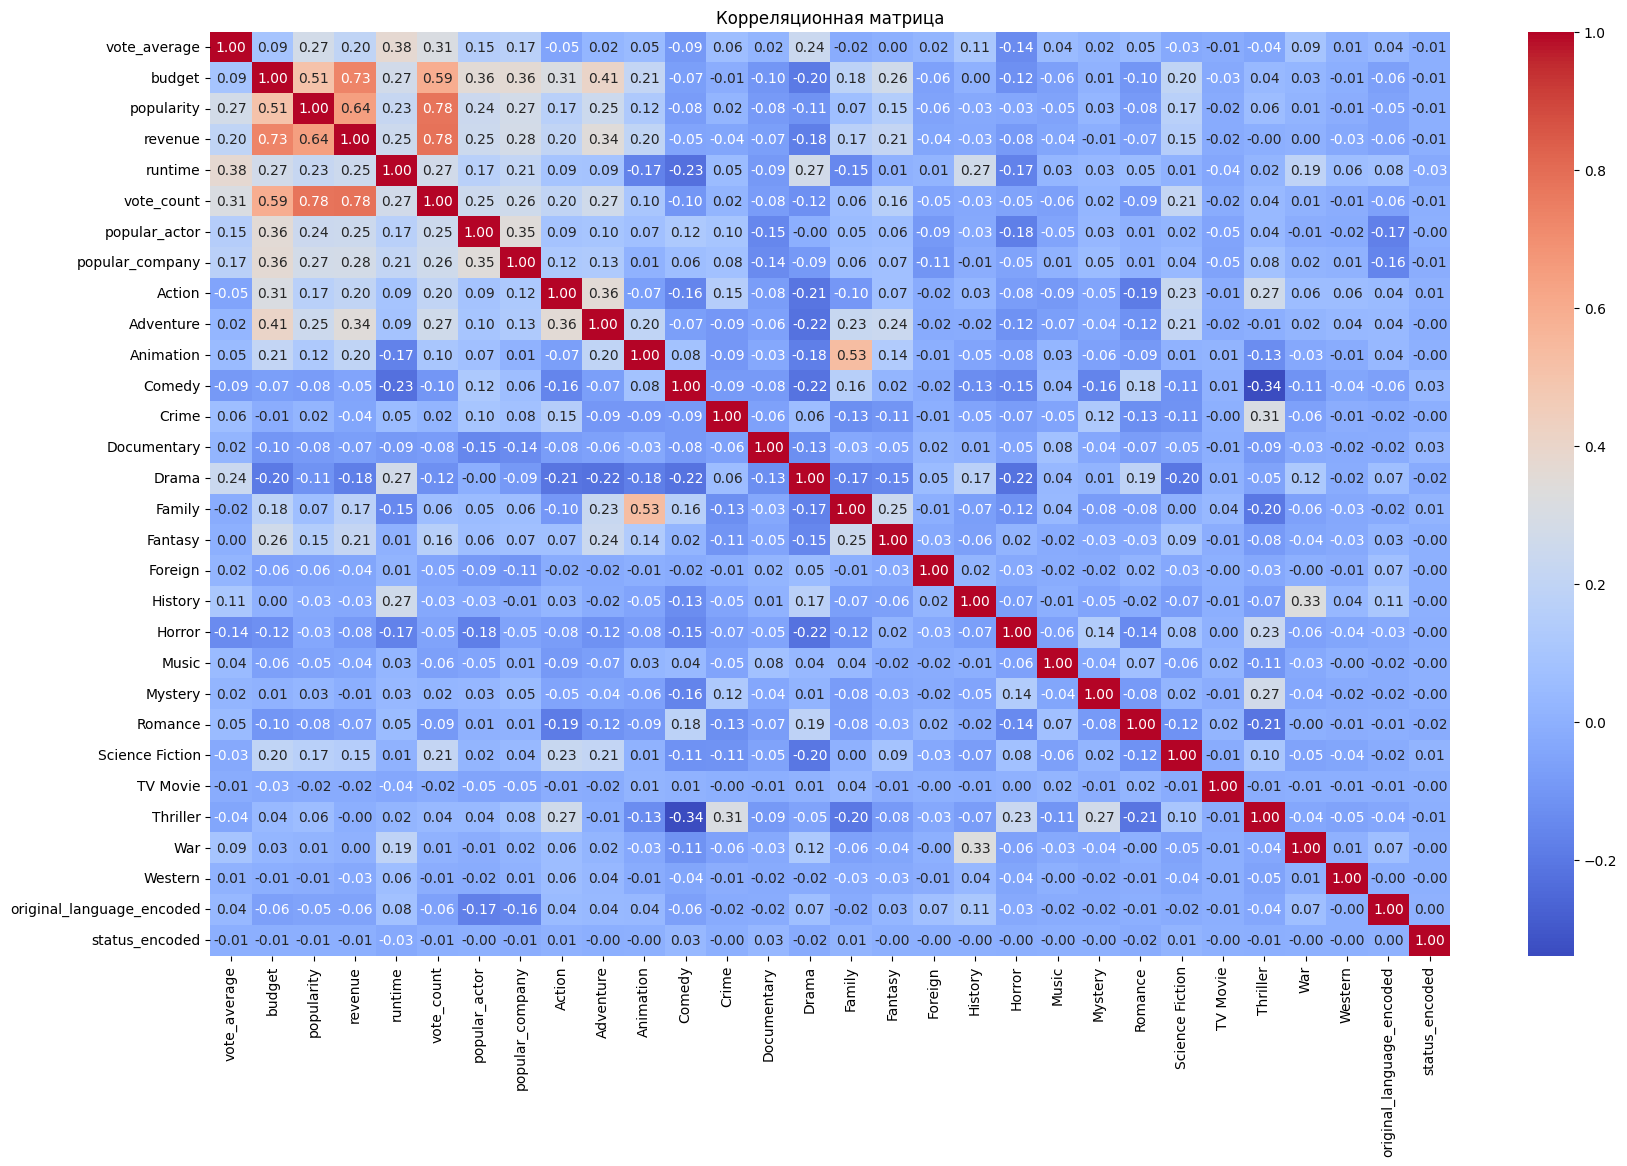

In [14]:
corr_all = data[[
    "vote_average", "budget", "popularity", "revenue", "runtime", "vote_count",
    "popular_actor", "popular_company"  # добавили эти два признака
] + list(genres_encoded.columns) + ["original_language_encoded", "status_encoded"]].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_all, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


In [16]:
correlation_with_target = corr_all['vote_average'].sort_values(ascending=False)
correlation_with_target

vote_average                 1.000000
runtime                      0.375046
vote_count                   0.312997
popularity                   0.273952
Drama                        0.237585
revenue                      0.197150
popular_company              0.173337
popular_actor                0.153051
History                      0.108665
budget                       0.093146
War                          0.091505
Crime                        0.062712
Animation                    0.047229
Romance                      0.046261
Music                        0.044153
original_language_encoded    0.037147
Adventure                    0.024066
Mystery                      0.021465
Documentary                  0.018714
Foreign                      0.018433
Western                      0.009475
Fantasy                      0.001179
status_encoded              -0.008048
TV Movie                    -0.014693
Family                      -0.018106
Science Fiction             -0.025658
Thriller    

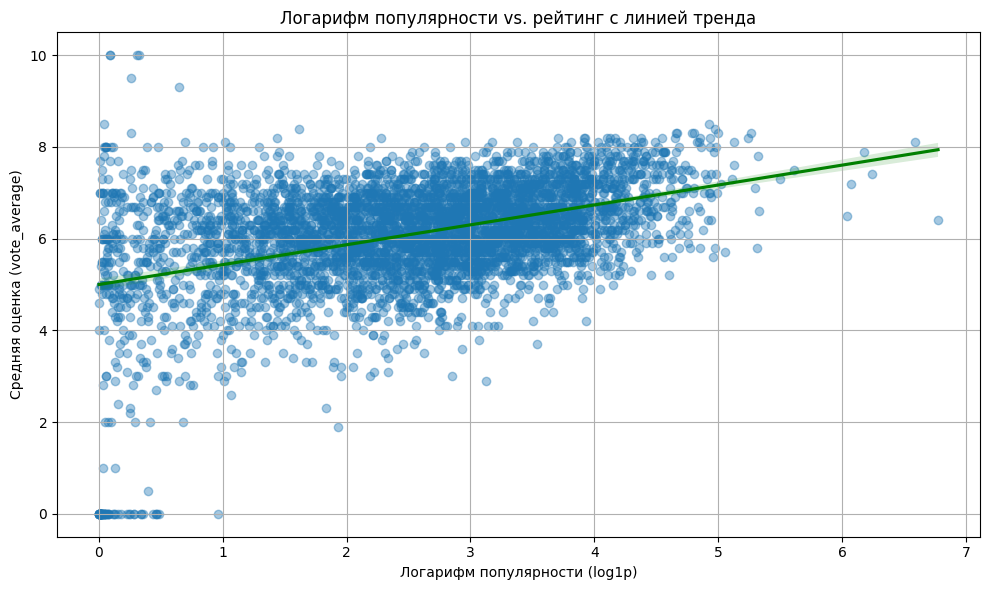

In [23]:
import numpy as np

data["log_popularity"] = np.log1p(data["popularity"])  # логарифмируем для сглаживания

plt.figure(figsize=(10, 6))
sns.regplot(
    data=data,
    x="log_popularity",
    y="vote_average",
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'green'}
)

plt.title("Логарифм популярности vs. рейтинг с линией тренда")
plt.xlabel("Логарифм популярности (log1p)")
plt.ylabel("Средняя оценка (vote_average)")
plt.grid(True)
plt.tight_layout()
plt.show()
